# Analyzing the UncertaintyForest Class by Reproducing Conditional Entropy Estimates

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Run the UncertaintyForest class to produce the results from Figure 2*

*Note: Figure 2 refers to Figure 2 from [this paper](https://arxiv.org/pdf/1907.00325.pdf)*

## Import Required Packages

In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

import sys
sys.path.append('../../docs/tutorials/functions')
from proglearn.forest import UncertaintyForest
from unc_forest_tutorials_functions import generate_data_fig2, cart_estimate, true_cond_entropy, format_func, estimate_ce, get_cond_entropy_vs_n, get_cond_entropy_vs_mu, plot_cond_entropy_by_n, plot_cond_entropy_by_mu, plot_fig2

Using TensorFlow backend.


## Specify Parameters

In [2]:
# Here are the "Real Parameters"
mus = [i * 0.5 for i in range(1, 11)] # range of means of the data (x-axis in right column)
effect_size = 1 # mu for left column
d1 = 1 # data dimensions = 1
d2 = 20 # data dimensions = 1, noise dimensions = 19
n1 = 3000 # number of data points for top row, right column (d1)
n2 = 6000 # number of data points for bottom row, right column (d2)
num_trials = 20 # number of trials to run
num_plotted_trials = 10 # the number of "fainter" lines to be displayed on the figure
sample_sizes_d1 = range(300, 1201, 90) # range of data points for top row, left column (d1)
sample_sizes_d2 = range(500, 3001, 250) # range of data points for bottom row, left column (d2)


## Specify Learners
Now, we'll specify which learners we'll compare (by label). Figure 2 uses three different learners, which are further specified in the function `estimate_ce`, which returns estimates of conditional entropy for a given dataset (X, y) and type of learner.

In [3]:
# Algorithms used to produce Figure 2
algos = [
    {
        'label': 'CART',
        'title': 'CART Forest',
        'color': "#1b9e77",
    },
    {
        'label': 'IRF',
        'title': 'Isotonic Reg. Forest',
        'color': "#fdae61",
    },
    {
        'label': 'UF',
        'title': 'Uncertainty Forest',
        'color': "#F41711",
    },
]

## Plot Figure 2

Finally, we'll run the code to obtain and plot the estimated conditional entropy vs. means and sample sizes (4 subplots).

../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: divide by zero encountered in log
  entropies = -np.sum(np.log(probs)*probs, axis = 1)
../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: invalid value encountered in multiply
  entropies = -np.sum(np.log(probs)*probs, axis = 1)
../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: divide by zero encountered in log
  entropies = -np.sum(np.log(probs)*probs, axis = 1)
../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: invalid value encountered in multiply
  entropies = -np.sum(np.log(probs)*probs, axis = 1)
../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: divide by zero encountered in log
  entropies = -np.sum(np.log(probs)*probs, axis = 1)
../../docs/tutorials/functions/unc_forest_tutorials_functions.py:192: RuntimeWarning: invalid value encountered in multiply
  e

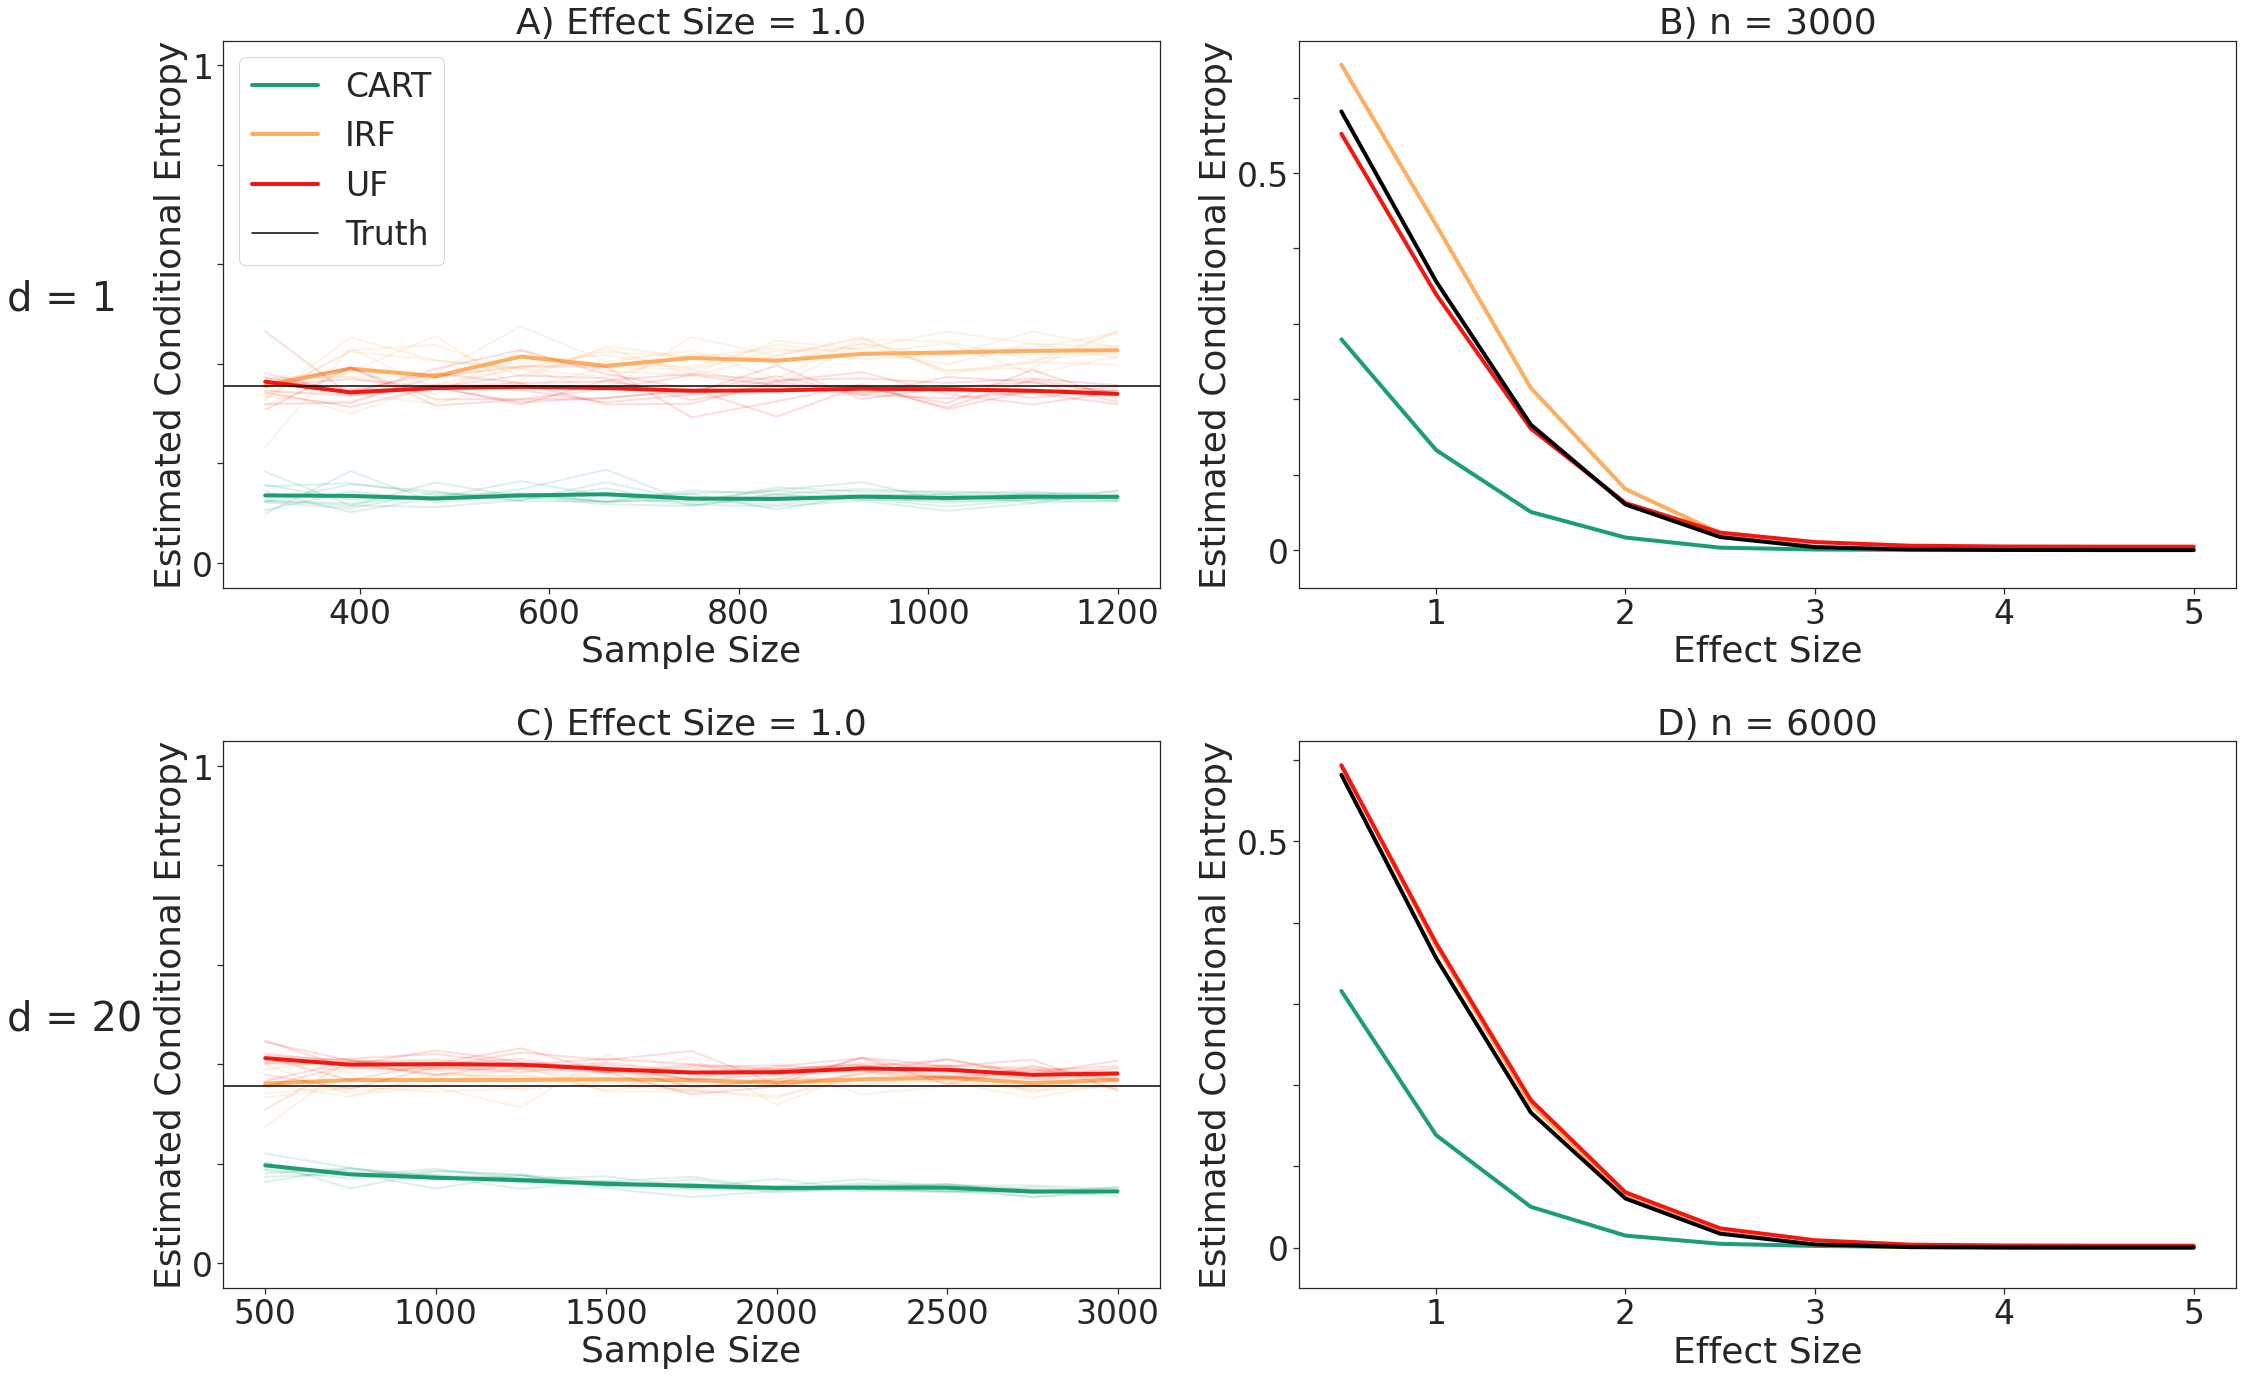

In [4]:
plot_fig2(num_plotted_trials, d1, d2, n1, n2, effect_size, algos, num_trials, sample_sizes_d1, sample_sizes_d2, mus)